In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as sp
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import pearsonr

In [2]:
application_train = pd.read_csv('application_train.csv')#training data
application_test = pd.read_csv('application_test.csv')#testing data
#data yang digunakan untuk training dan test

terdapat satu kolom yang kurang pada data testing, yaitu kolom 'Target' seperti yang ada pada dataframe 'application_train'

# Data Preprocessing & EDA

## 1. Data Kategorikal

Data Frame prevous_application

In [3]:
bureau = pd.read_csv('bureau.csv')
bureau_b = pd.read_csv('bureau_balance.csv')
install_p = pd.read_csv('installments_payments.csv')
credit_cb= pd.read_csv('credit_card_balance.csv')
sample_s = pd.read_csv('sample_submission.csv')
previous_application = pd.read_csv('previous_application.csv')

Pengajuan kredit yang dilakukan oleh nasabah atau debitur bisa dilakukan oleh lebih dari satu kali

<AxesSubplot: xlabel='count', ylabel='NAME_CONTRACT_TYPE'>

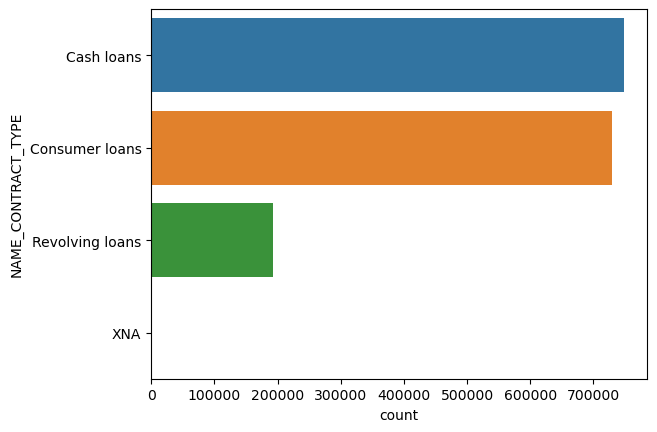

In [4]:
sns.countplot(data=previous_application,y='NAME_CONTRACT_TYPE', order = previous_application['NAME_CONTRACT_TYPE'].value_counts().index)

Pengajuan kredit paling tinggi dilakukan pada pinjaman tunai atau 'Cash Loans'

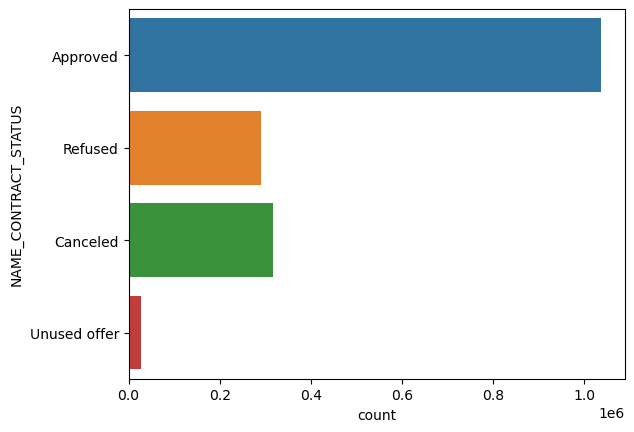

In [5]:
ax = sns.countplot(data=previous_application,y='NAME_CONTRACT_STATUS')

In [6]:
previous_application.groupby('NAME_CONTRACT_STATUS')['NAME_CONTRACT_STATUS'].count()

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

Jumlah kredit sebelumnya lebih banyak yang diterima, dibandingkan dengan ditolak, dibatalkan, ataupun penawaran yang tidak digunakan

<AxesSubplot: xlabel='count', ylabel='NAME_GOODS_CATEGORY'>

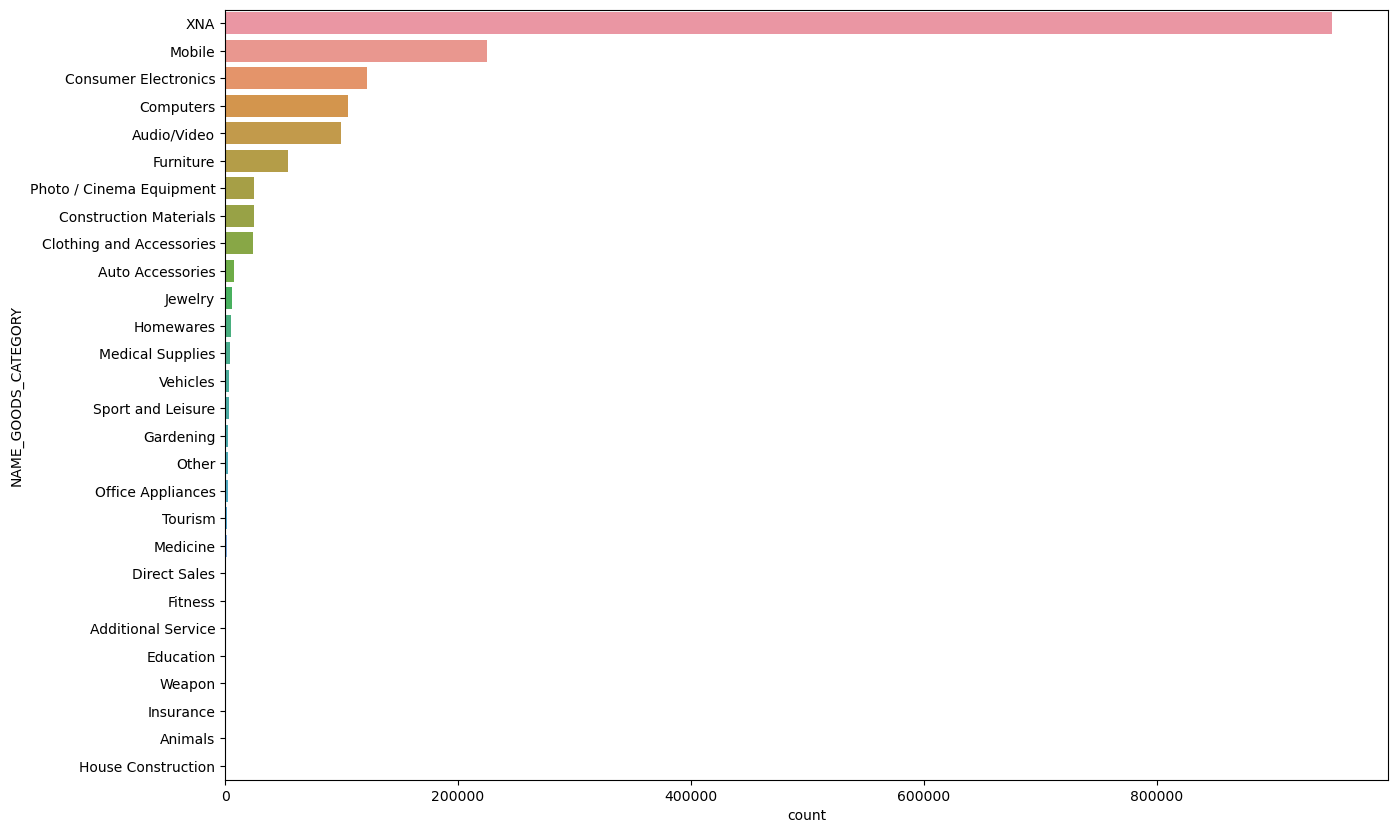

In [7]:
fig = plt.figure(figsize =(15,10))
sns.countplot(data=previous_application,y='NAME_GOODS_CATEGORY',order=previous_application['NAME_GOODS_CATEGORY'].value_counts().index)

Dapat terlihat bahwa 'XNA' mendominasi terkait kategori pengajuan kredit berdasarkan barang. Namun, jika mengesampingkan nilai 'XNA', maka barang yang paling banyak diajukan untuk kredit adalah 'MObile', elekronik, dan komputer.

Ada beberapa tipe industri yang dipilih konsumen, namun banyak pula yang tidak memiliki nama industri yang jelas (Missing Values)

Text(0.5, 0, 'Banyaknya')

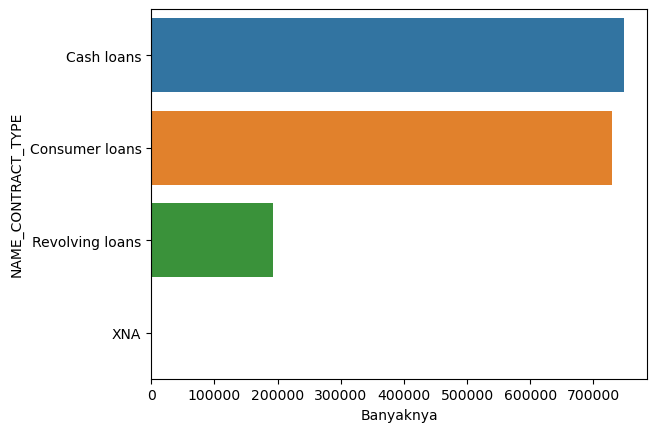

In [8]:
sns.countplot(data=previous_application,y='NAME_CONTRACT_TYPE',order=previous_application['NAME_CONTRACT_TYPE'].value_counts().index)
plt.xlabel('Banyaknya')

In [9]:
id_app = application_train[['SK_ID_CURR','NAME_INCOME_TYPE','AMT_CREDIT']]
id_appt = application_test[['SK_ID_CURR','NAME_INCOME_TYPE','AMT_CREDIT']]

Mengambil beberapa kolom dari tabel 'bureau' untuk mengetahui berapa banyak kredit yang diterima ataupun ditolak berdasarkan 'Income Type'

## Previous Application Berdasarkan Pekerjaan

<AxesSubplot: xlabel='count', ylabel='NAME_INCOME_TYPE'>

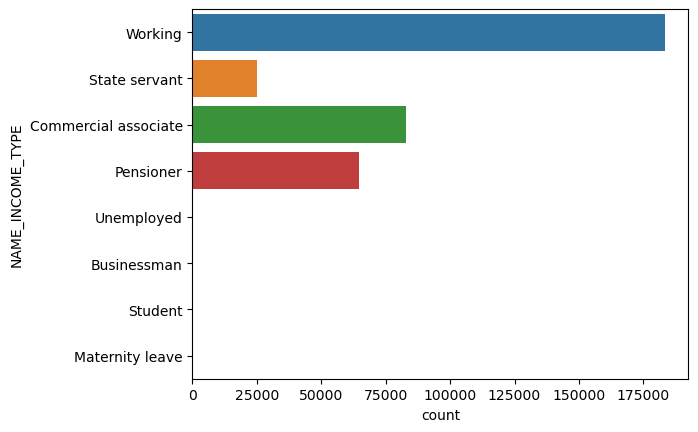

In [10]:
id_data = pd.concat([id_app,id_appt], axis =0)
id_data = id_data.sort_values(by='SK_ID_CURR')
id_data = id_data.reset_index()
sns.countplot(data = id_data, y='NAME_INCOME_TYPE')

Mayoritas dari yang mengajukan kredit adalah 'Working'

In [11]:
coba = previous_application[['SK_ID_CURR','NAME_CONTRACT_STATUS','NAME_GOODS_CATEGORY']]

In [12]:
coba_setuju = coba.loc[coba['NAME_CONTRACT_STATUS'] == 'Approved']
coba_setuju = pd.DataFrame(coba_setuju.groupby('SK_ID_CURR').count())
coba_setuju = coba_setuju.set_axis(['Number','Goods'], axis=1,inplace = False)
coba_setuju['Status'] ='Approved'

In [13]:
coba_gagal = coba.loc[coba['NAME_CONTRACT_STATUS'] == 'Refused']
coba_gagal = pd.DataFrame(coba_gagal.groupby('SK_ID_CURR').count())
coba_gagal = coba_gagal.set_axis(['Number','Goods'], axis=1, inplace =False)
coba_gagal['Status'] = 'Refused'

In [14]:
coba_batal = coba.loc[coba['NAME_CONTRACT_STATUS'] == 'Canceled']
coba_batal= pd.DataFrame(coba_batal.groupby('SK_ID_CURR').count())
coba_batal = coba_batal.set_axis(['Number','Goods'], axis=1, inplace =False)
coba_batal['Status'] = 'Canceled'

In [15]:
coba_unused = coba.loc[coba['NAME_CONTRACT_STATUS'] == 'Unused offer']
coba_unused = pd.DataFrame(coba_unused.groupby('SK_ID_CURR').count())
coba_unused = coba_unused.set_axis(['Number','Goods'], axis=1, inplace =False)
coba_unused['Status'] = 'Unused offer'

In [16]:
job_data = pd.concat([coba_setuju,coba_gagal,coba_batal,coba_unused])
job_data

,Number,Goods,Status
SK_ID_CURR,,,
100001,1,1,Approved
100002,1,1,Approved
100003,3,3,Approved
100004,1,1,Approved
100005,1,1,Approved
...,...,...,...
456210,1,1,Unused offer
456220,1,1,Unused offer
456230,2,2,Unused offer


In [17]:
job_data.reset_index(inplace=True)
job_data = job_data.rename(columns = {'SK_ID_CURR':'SK_ID_CURR'})

In [18]:
job_data = job_data.merge(id_data,how='inner',on='SK_ID_CURR')
job_data.head()

,SK_ID_CURR,Number,Goods,Status,index,NAME_INCOME_TYPE,AMT_CREDIT
0,100001,1,1,Approved,0,Working,568800.0
1,100002,1,1,Approved,0,Working,406597.5
2,100003,3,3,Approved,1,State servant,1293502.5
3,100004,1,1,Approved,2,Working,135000.0
4,100005,1,1,Approved,1,Working,222768.0


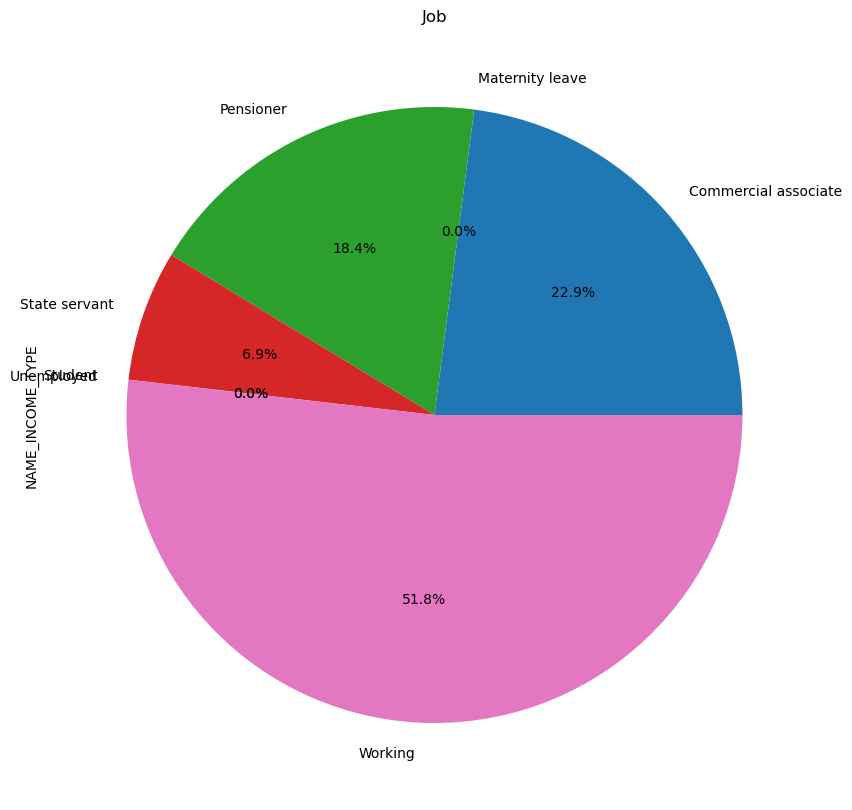

In [19]:
fig = plt.figure(figsize =(10,15))
plt.title('Job')
ax= job_data.groupby('NAME_INCOME_TYPE').NAME_INCOME_TYPE.count().plot.pie(figsize=(10,10),autopct='%1.1f%%')

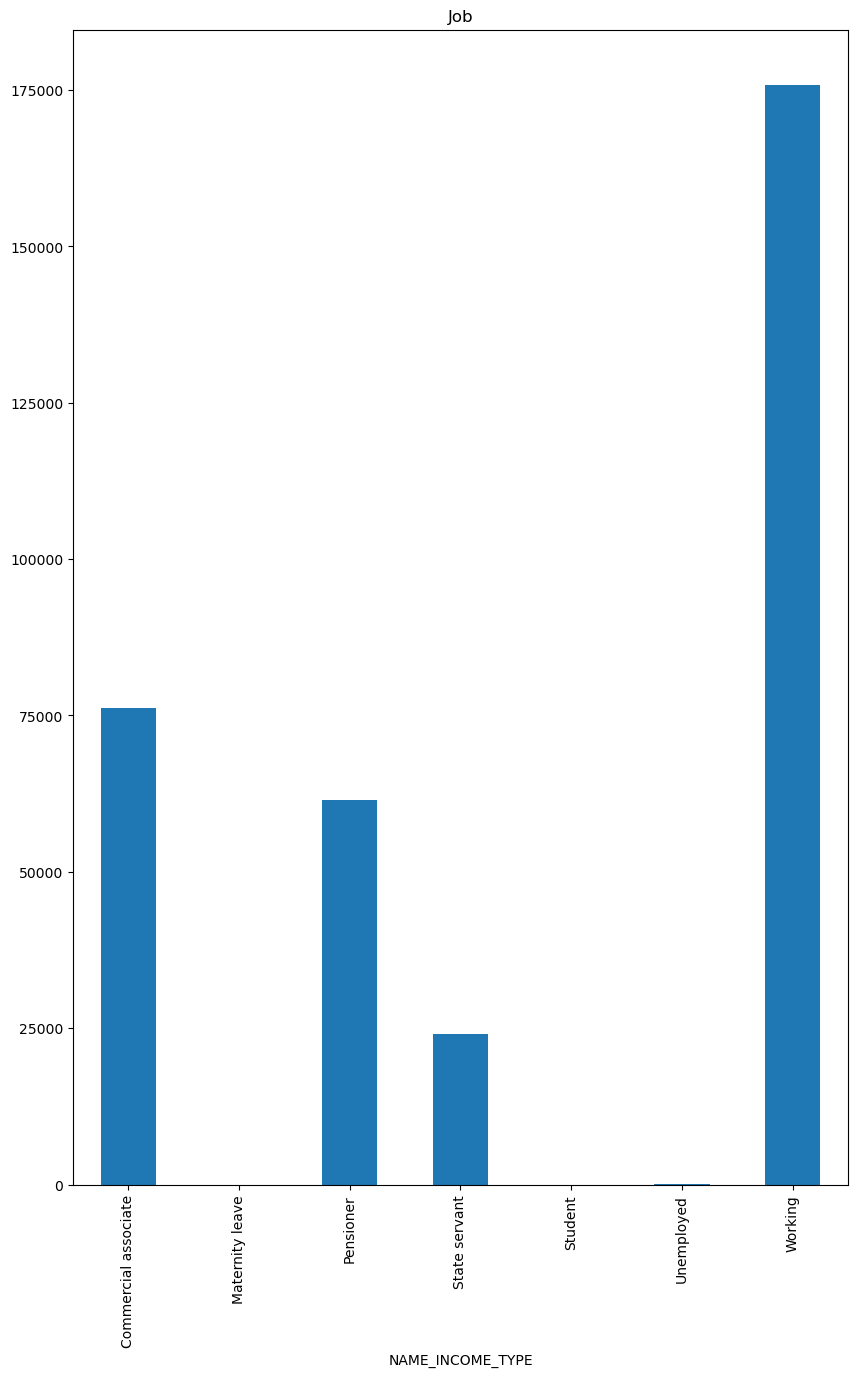

In [20]:
job_approved = job_data.loc[job_data['Status'] == 'Approved']
fig = plt.figure(figsize =(10,15))
plt.title('Job')
ax= job_approved.groupby('NAME_INCOME_TYPE').NAME_INCOME_TYPE.count().plot(kind='bar')

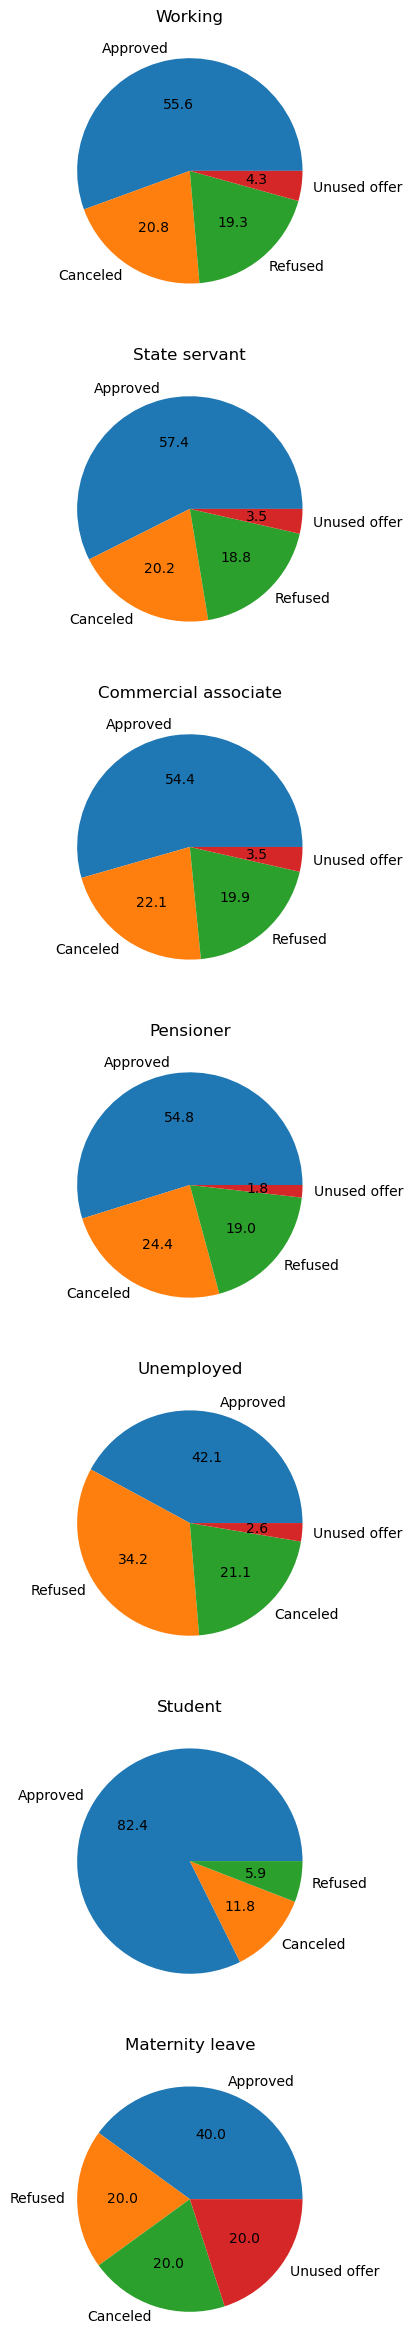

In [21]:
category_of_job = job_data['NAME_INCOME_TYPE'].unique()
len_category_of_job = len(category_of_job)

for i, var in enumerate(category_of_job):
    plt.subplot(len_category_of_job,1,i+1)
    a = job_data.loc[job_data['NAME_INCOME_TYPE'] == var]
    a['Status'].value_counts().plot.pie(fontsize=10, figsize=(30,30), autopct="%.1f",label='')
    plt.gca().set_aspect('equal')
    plt.title(var)
    
    
plt.show()    

Pengajuan kredit pada orang yang cuti melahirkan jauh lebih sedikit yang diterima dibandingkan dengan pekerjaan yang lain

### Jumlah yang diterima berdasarkan pekerjaan

In [22]:
job_data_approved = job_data.loc[job_data['Status'] == 'Approved']

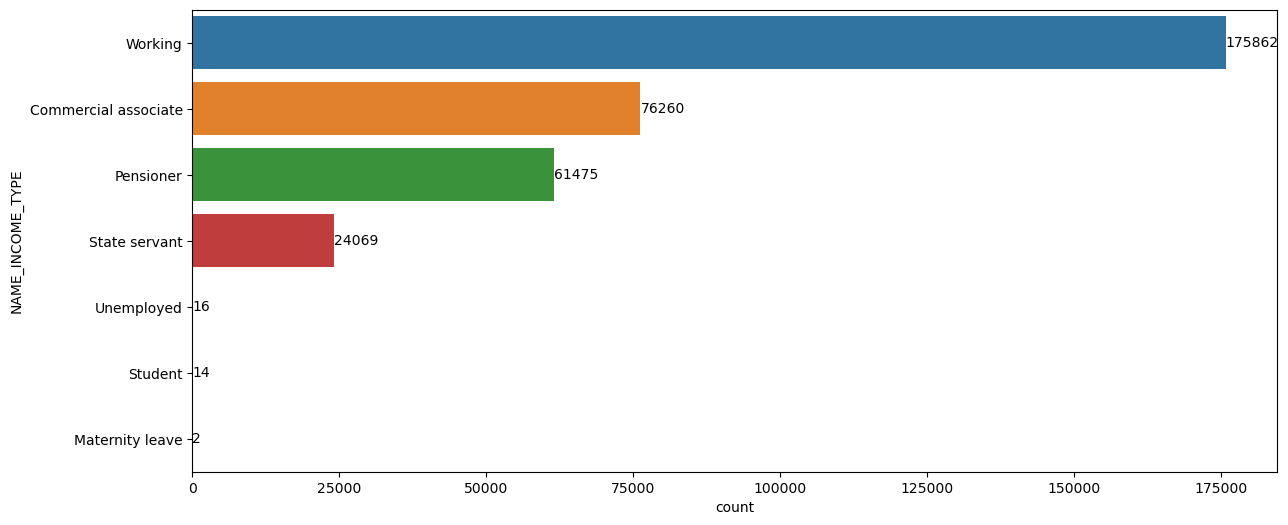

In [23]:
fig = plt.figure(figsize =(14,6))
ax = sns.countplot(data=job_data_approved,y='NAME_INCOME_TYPE',order=job_data_approved['NAME_INCOME_TYPE'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i,)

<AxesSubplot: xlabel='NAME_INCOME_TYPE'>

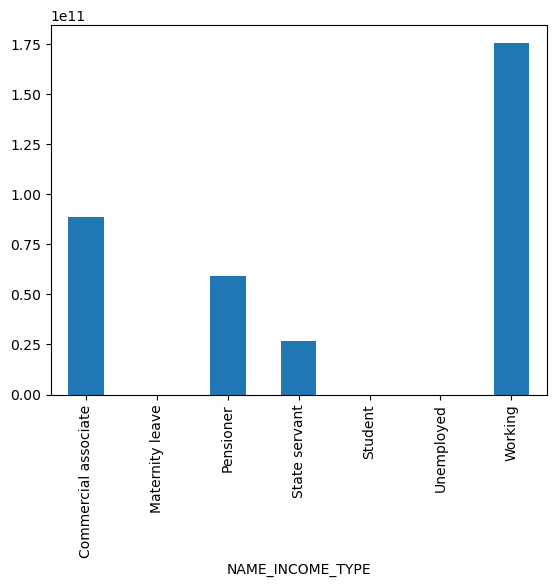

In [24]:
job_data.groupby('NAME_INCOME_TYPE')['AMT_CREDIT'].sum().plot(kind='bar')

## Previous Application Berdasarkan Gender

In [25]:
data_gender_train = application_train[['SK_ID_CURR','CODE_GENDER','AMT_CREDIT']]
data_gender_test = application_test[['SK_ID_CURR','CODE_GENDER','AMT_CREDIT']]

In [26]:
data_gender = pd.concat([data_gender_train,data_gender_test])
data_gender = data_gender.sort_values(by='SK_ID_CURR',ascending = True)
data_gender = data_gender.reset_index()

In [27]:
mix_data = data_gender.merge(previous_application,how='outer',on='SK_ID_CURR')

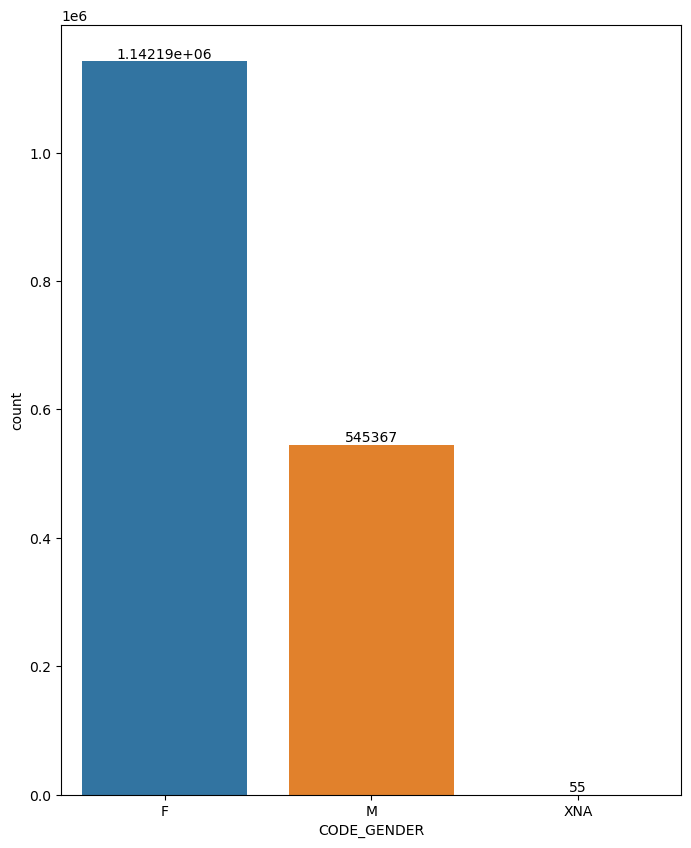

In [28]:
fig = plt.figure(figsize =(8,10))
ax = sns.countplot(data=mix_data, x='CODE_GENDER')
for i in ax.containers:
    ax.bar_label(i,)

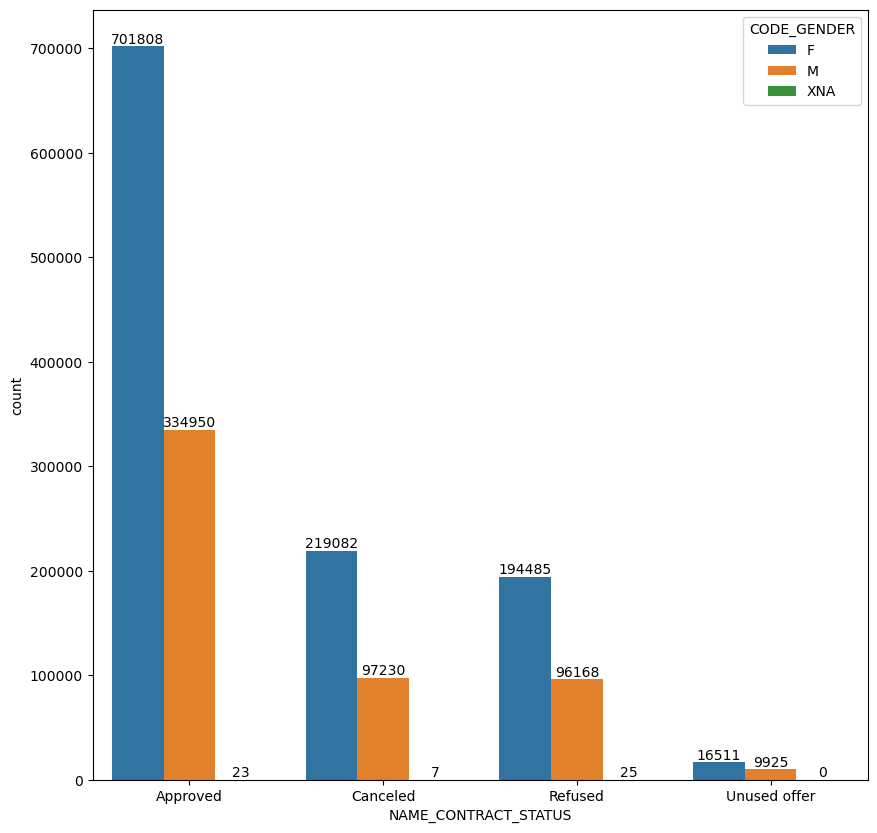

In [29]:
fig = plt.figure(figsize =(10,10))
ax = sns.countplot(data=mix_data, x='NAME_CONTRACT_STATUS', hue='CODE_GENDER')
for i in ax.containers:
    ax.bar_label(i,)

Pengajuan kredit dilakukan lebih banyak oleh perempuan jika dibandingkan dengan laki-laki.

Jika melihat dari pengajuannya, maka pengajuan kredit perempuan banyak yang diterima dibandingkan dengan ditolak

<AxesSubplot: xlabel='CODE_GENDER', ylabel='AMT_CREDIT'>

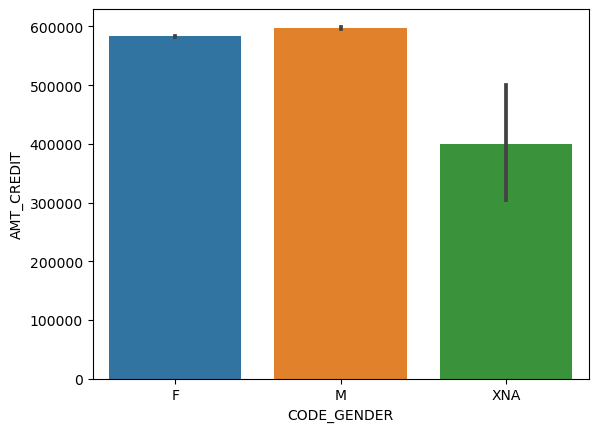

In [30]:
sns.barplot(data=data_gender, x='CODE_GENDER',y='AMT_CREDIT')

meskipun perempuan memiliki pengajuan kredit yang paling banyak, namun jumlah kredit lebih besar dibanding perempuan

In [31]:
men_category = mix_data.loc[mix_data['CODE_GENDER'] == 'M']

<AxesSubplot: xlabel='count', ylabel='NAME_GOODS_CATEGORY'>

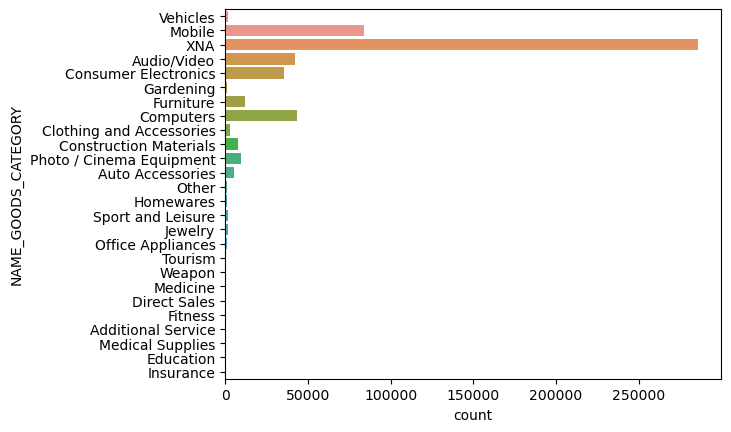

In [32]:
sns.countplot(data=men_category,y='NAME_GOODS_CATEGORY')

In [33]:
bureau.sort_values(by='SK_ID_CURR')

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
248487,100001,5896633,Closed,currency 1,-1572,0,-1329.0,-1328.0,NaN,0,85500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248485,100001,5896631,Closed,currency 1,-909,0,-179.0,-877.0,NaN,0,279720.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248490,100001,5896636,Active,currency 1,-320,0,411.0,NaN,NaN,0,168345.0,110281.5,NaN,0.0,Consumer credit,-10,9364.5
248489,100001,5896635,Active,currency 1,-49,0,1778.0,NaN,NaN,0,378000.0,373239.0,0.0,0.0,Consumer credit,-16,10822.5
248486,100001,5896632,Closed,currency 1,-879,0,-514.0,-544.0,NaN,0,91620.0,0.0,0.0,0.0,Consumer credit,-155,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010013,456255,5126337,Closed,currency 1,-2337,0,-1243.0,-1621.0,16618.5,0,450000.0,NaN,NaN,0.0,Consumer credit,-1621,0.0
1010012,456255,5126336,Closed,currency 1,-2337,0,8620.0,-779.0,2646.0,1,38925.0,NaN,NaN,0.0,Credit card,-779,3244.5
1010004,456255,5126328,Closed,currency 1,-970,0,-621.0,-712.0,NaN,0,27472.5,0.0,0.0,0.0,Consumer credit,-700,NaN
1010006,456255,5126330,Closed,currency 1,-1021,0,-959.0,-959.0,NaN,0,22995.0,0.0,NaN,0.0,Consumer credit,-953,3244.5


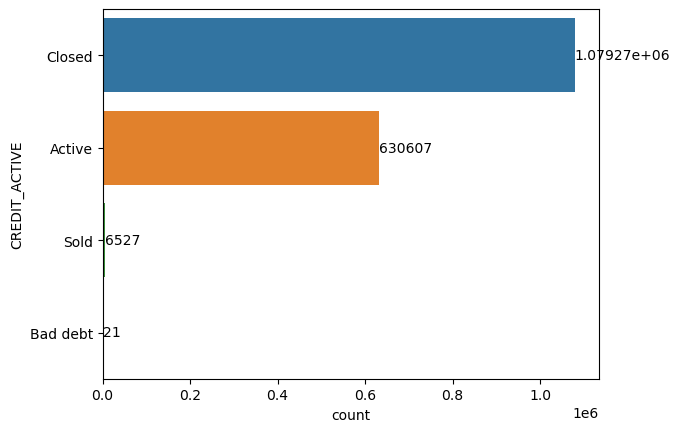

In [34]:
ax= sns.countplot(data=bureau,y='CREDIT_ACTIVE')
for i in ax.containers:
    ax.bar_label(i,)

Saat mengajukan kembali, beberapa kredit sudah selesai dan masih ada beberapa yang aktif

# EDA Numerical Data

<AxesSubplot: xlabel='CREDIT_ACTIVE'>

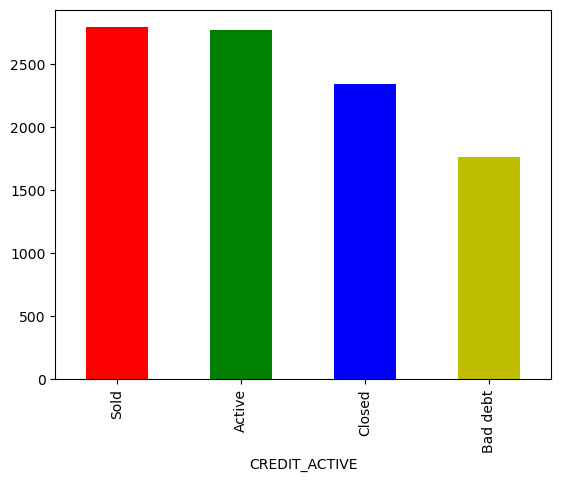

In [35]:
bureau.groupby('CREDIT_ACTIVE').CREDIT_DAY_OVERDUE.max().sort_values(ascending = False).plot(kind='bar',color=['r', 'g', 'b','y'])

Bahkan pada credit yang masih aktif, ada yang belum membayar hingga lebih dari 2000 hari

In [36]:
previous_application

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


# Check Missing Values

In [37]:
main_data = pd.concat([application_train,application_test])
main_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,NaN,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,NaN,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,NaN,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,NaN,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


<AxesSubplot: xlabel='NAME_HOUSING_TYPE'>

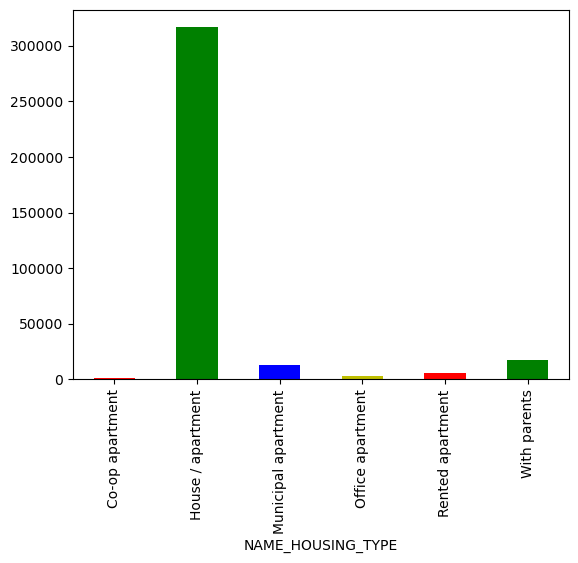

In [38]:
main_data.groupby('NAME_HOUSING_TYPE').NAME_HOUSING_TYPE.count().plot(kind='bar',color=['r', 'g', 'b','y'])

In [39]:
def usia(tahun):
    if (tahun*(-1)/365)<20:
        return '<20'
    elif (tahun*(-1)/365)>=20 and (tahun*(-1)/365)<30:
        return '>=20 and <30'
    elif (tahun*(-1)/365)>=30 and (tahun*(-1)/365)<40:
        return '>=30 and <40'
    elif (tahun*(-1)/365)>=40 and (tahun*(-1)/365)<50:
        return '>=40 and <50'
    elif (tahun*(-1)/365)>=50:
        return '>=50'

In [40]:
main_data2 = main_data.copy()
main_data2['Age_Category'] = main_data2['DAYS_BIRTH'].apply(usia)

<AxesSubplot: xlabel='Age_Category', ylabel='count'>

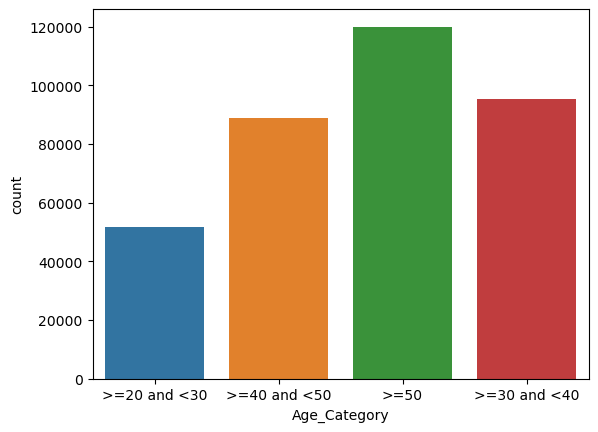

In [41]:
sns.countplot(data=main_data2,x='Age_Category')

Usia 50 tahun keatas yang paling banyak mengajukan kredit 

In [42]:
approval = previous_application[['SK_ID_CURR','NAME_CONTRACT_STATUS']]
approval = approval.groupby('SK_ID_CURR')['NAME_CONTRACT_STATUS'].agg(lambda x: sp.mode(x)[0][0])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4100\758758294.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  approval = approval.groupby('SK_ID_CURR')['NAME_CONTRACT_STATUS'].agg(lambda x: sp.mode(x)[0][0])
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4100\758758294.py:2: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pand

In [43]:
approval = pd.DataFrame(approval)
approval

,NAME_CONTRACT_STATUS
SK_ID_CURR,
100001,Approved
100002,Approved
100003,Approved
100004,Approved
100005,Canceled
...,...
456251,Approved
456252,Approved
456253,Approved


In [44]:
approval.reset_index(inplace=True)

In [45]:
approval.loc[approval['NAME_CONTRACT_STATUS'] == 'Refused']

,SK_ID_CURR,NAME_CONTRACT_STATUS
28,100030,Refused
32,100035,Refused
40,100043,Refused
48,100051,Refused
55,100059,Refused
...,...,...
338820,456218,Refused
338826,456224,Refused
338827,456225,Refused
338844,456243,Refused


In [46]:
main_data = main_data.merge(approval,on='SK_ID_CURR',how='inner')

In [47]:
main_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_STATUS
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Approved
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Approved
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Approved
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Approved
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,456221,NaN,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Approved
338853,456222,NaN,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Approved
338854,456223,NaN,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,...,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0,Approved
338855,456224,NaN,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,Refused


## Target data

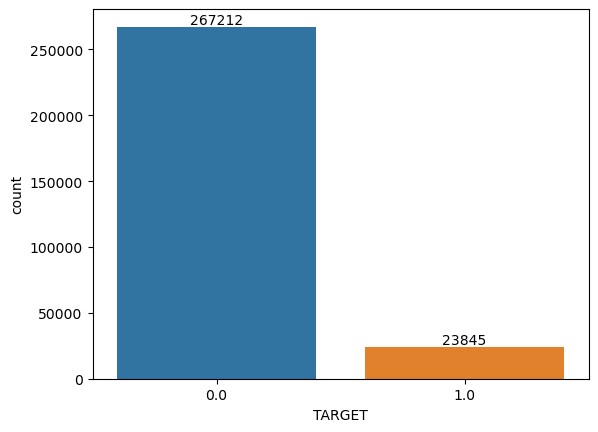

In [48]:
ax = sns.countplot(data=main_data,x='TARGET')
for i in ax.containers:
    ax.bar_label(i,)

## Data Preprocessing

In [49]:
feature_data = main_data.drop(['TARGET'],axis=1)
target = main_data['TARGET']

In [50]:
for col in feature_data.columns:
  if feature_data[col].dtypes == 'O':
    feature_data[col] = feature_data[col].astype('category')

In [51]:
feature_data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_STATUS
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Approved
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Approved
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Approved
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Approved
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Approved
338853,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Approved
338854,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0,Approved
338855,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,Refused


In [52]:
convert = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_CONTRACT_STATUS','FLAG_OWN_CAR']
for col in convert:
  feature_data[col] = feature_data[col].astype('category')

In [53]:
numerical_data = feature_data.select_dtypes(exclude=['category'])
categorical_data = feature_data.select_dtypes(include=['category'])

# Handle Missing Values

Missing Value pada data kategori akan diisi dengan mode dan data numerik akan diisi dengan mean

In [54]:
for col in categorical_data.columns:
    imputation = categorical_data.mode()[col][0]
    categorical_data[col].fillna(value = imputation,inplace=True)
    #data kategori
for col in numerical_data:
    imputation2 = numerical_data.mean()[col]
    numerical_data[col].fillna(value = imputation2,inplace=True)
    #data numerik


In [55]:
target

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\lib\pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
338852    1.0
338853    1.0
338854    1.0
338855    1.0
338856    1.0
Name: TARGET, Length: 338857, dtype: category
Categories (2, float64): [0.0, 1.0]

In [56]:
categorical_data.isnull().sum()
numerical_data.isnull().sum()

SK_ID_CURR                    0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 105, dtype: int64

## Korelasi dengan Data Numerik

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['tolerance'] = 1/vif.VIF
    vif['meanVIF'] = vif.VIF.mean()

    return(vif)

calc_vif((numerical_data).select_dtypes(include=['int64','float64']))

,variables,VIF,tolerance,meanVIF
0,SK_ID_CURR,8.312234,0.120305,2845.053883
1,CNT_CHILDREN,6.299630,0.158739,2845.053883
2,AMT_INCOME_TOTAL,1.643433,0.608483,2845.053883
3,AMT_CREDIT,131.518790,0.007603,2845.053883
4,AMT_ANNUITY,12.292458,0.081351,2845.053883
...,...,...,...,...
100,AMT_REQ_CREDIT_BUREAU_DAY,1.106668,0.903613,2845.053883
101,AMT_REQ_CREDIT_BUREAU_WEEK,1.072571,0.932339,2845.053883
102,AMT_REQ_CREDIT_BUREAU_MON,1.100793,0.908436,2845.053883
103,AMT_REQ_CREDIT_BUREAU_QRT,1.188239,0.841581,2845.053883


In [58]:
vif_values = calc_vif((numerical_data).select_dtypes(include=['int64','float64']))

In [59]:
vif_values.loc[(vif_values['VIF'] <10) | (vif_values['tolerance']>0.01) ].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 104
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   variables  59 non-null     object 
 1   VIF        59 non-null     float64
 2   tolerance  59 non-null     float64
 3   meanVIF    59 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.3+ KB


Ada 49 kolom yang terbebas dari uji multikolinieritas

In [60]:
vif_value_no = vif_values.loc[(vif_values['VIF'] >10) & (vif_values['tolerance']<0.01) ]

In [61]:
remove_variable =vif_value_no['variables'].unique()

In [62]:
main_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'NAME_CONTRACT_STATUS'],
      dtype='object', length=123)

In [63]:
for i in remove_variable:
    numerical_data = numerical_data.drop(i,axis=1)

In [64]:
numerical_data = numerical_data.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_6','FLAG_DOCUMENT_8','FLAG_DOCUMENT_10','FLAG_DOCUMENT_12','FLAG_DOCUMENT_14','FLAG_DOCUMENT_16','FLAG_DOCUMENT_18','FLAG_DOCUMENT_20'], axis=1)

In [65]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338857 entries, 0 to 338856
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   338857 non-null  int64  
 1   CNT_CHILDREN                 338857 non-null  int64  
 2   AMT_INCOME_TOTAL             338857 non-null  float64
 3   AMT_ANNUITY                  338857 non-null  float64
 4   REGION_POPULATION_RELATIVE   338857 non-null  float64
 5   DAYS_BIRTH                   338857 non-null  int64  
 6   DAYS_REGISTRATION            338857 non-null  float64
 7   DAYS_ID_PUBLISH              338857 non-null  int64  
 8   OWN_CAR_AGE                  338857 non-null  float64
 9   FLAG_WORK_PHONE              338857 non-null  int64  
 10  FLAG_PHONE                   338857 non-null  int64  
 11  FLAG_EMAIL                   338857 non-null  int64  
 12  CNT_FAM_MEMBERS              338857 non-null  float64
 13 

# Korelasi dengan Data Kategorik

In [66]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = sp.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [67]:
list_cramersv = []
for a in categorical_data.columns:
    out = cramers_v(categorical_data[a], main_data.TARGET)
    list_cramersv.append([a,out])    
    print("Korelasi dengan TARGET dan",a,"=",out)

Korelasi dengan TARGET dan NAME_CONTRACT_TYPE = 0.029717121658822426
Korelasi dengan TARGET dan CODE_GENDER = 0.05686697829907231
Korelasi dengan TARGET dan FLAG_OWN_CAR = 0.02009599112831982
Korelasi dengan TARGET dan FLAG_OWN_REALTY = 0.009121250249799191
Korelasi dengan TARGET dan NAME_TYPE_SUITE = 0.009191763836538138
Korelasi dengan TARGET dan NAME_INCOME_TYPE = 0.06496484431460224
Korelasi dengan TARGET dan NAME_EDUCATION_TYPE = 0.05504158170548216
Korelasi dengan TARGET dan NAME_FAMILY_STATUS = 0.04185733382843215
Korelasi dengan TARGET dan NAME_HOUSING_TYPE = 0.03717926664469923
Korelasi dengan TARGET dan OCCUPATION_TYPE = 0.0621651002515869
Korelasi dengan TARGET dan WEEKDAY_APPR_PROCESS_START = 0.006705400013403489
Korelasi dengan TARGET dan ORGANIZATION_TYPE = 0.07219289160770988
Korelasi dengan TARGET dan FONDKAPREMONT_MODE = 0.016207016759359857
Korelasi dengan TARGET dan HOUSETYPE_MODE = 0.004998666832177267
Korelasi dengan TARGET dan WALLSMATERIAL_MODE = 0.01775531936849

In [68]:
drop_col = []
for a in categorical_data.columns:
  out = cramers_v(categorical_data[a], main_data.TARGET)
  if out < 0.05 :
    drop_col.append(a)
    print("Korelasi dengan TARGET and",a,"=",out)  

Korelasi dengan TARGET and NAME_CONTRACT_TYPE = 0.029717121658822426
Korelasi dengan TARGET and FLAG_OWN_CAR = 0.02009599112831982
Korelasi dengan TARGET and FLAG_OWN_REALTY = 0.009121250249799191
Korelasi dengan TARGET and NAME_TYPE_SUITE = 0.009191763836538138
Korelasi dengan TARGET and NAME_FAMILY_STATUS = 0.04185733382843215
Korelasi dengan TARGET and NAME_HOUSING_TYPE = 0.03717926664469923
Korelasi dengan TARGET and WEEKDAY_APPR_PROCESS_START = 0.006705400013403489
Korelasi dengan TARGET and FONDKAPREMONT_MODE = 0.016207016759359857
Korelasi dengan TARGET and HOUSETYPE_MODE = 0.004998666832177267
Korelasi dengan TARGET and WALLSMATERIAL_MODE = 0.017755319368497974
Korelasi dengan TARGET and EMERGENCYSTATE_MODE = 0.004828250072365167


In [69]:
categorical_data = categorical_data.drop(drop_col,axis=1)
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338857 entries, 0 to 338856
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   CODE_GENDER           338857 non-null  category
 1   NAME_INCOME_TYPE      338857 non-null  category
 2   NAME_EDUCATION_TYPE   338857 non-null  category
 3   OCCUPATION_TYPE       338857 non-null  category
 4   ORGANIZATION_TYPE     338857 non-null  category
 5   NAME_CONTRACT_STATUS  338857 non-null  category
dtypes: category(6)
memory usage: 12.6 MB


In [70]:
correlate = []
for i in categorical_data.columns:
    for j in categorical_data.columns:
        if i !=j :
            out = cramers_v(categorical_data[i], categorical_data[j])
            print("Korelasi antara",i,"dan ",j,"= ", out)
            if out > 0.5:
                correlate.append([i,j,out])
    print("\n\n")

Korelasi antara CODE_GENDER dan  NAME_INCOME_TYPE =  0.12135329961235865
Korelasi antara CODE_GENDER dan  NAME_EDUCATION_TYPE =  0.023367068805231858
Korelasi antara CODE_GENDER dan  OCCUPATION_TYPE =  0.31680973388350053
Korelasi antara CODE_GENDER dan  ORGANIZATION_TYPE =  0.24030305049455317
Korelasi antara CODE_GENDER dan  NAME_CONTRACT_STATUS =  0.013428290793704448



Korelasi antara NAME_INCOME_TYPE dan  CODE_GENDER =  0.12135329961235863
Korelasi antara NAME_INCOME_TYPE dan  NAME_EDUCATION_TYPE =  0.09991759264423995
Korelasi antara NAME_INCOME_TYPE dan  OCCUPATION_TYPE =  0.23161137804950127
Korelasi antara NAME_INCOME_TYPE dan  ORGANIZATION_TYPE =  0.4561033866909156
Korelasi antara NAME_INCOME_TYPE dan  NAME_CONTRACT_STATUS =  0.02709189795098142



Korelasi antara NAME_EDUCATION_TYPE dan  CODE_GENDER =  0.023367068805231858
Korelasi antara NAME_EDUCATION_TYPE dan  NAME_INCOME_TYPE =  0.09991759264423995
Korelasi antara NAME_EDUCATION_TYPE dan  OCCUPATION_TYPE =  0.180155738

In [71]:
print(correlate)

[]


In [72]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338857 entries, 0 to 338856
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   CODE_GENDER           338857 non-null  category
 1   NAME_INCOME_TYPE      338857 non-null  category
 2   NAME_EDUCATION_TYPE   338857 non-null  category
 3   OCCUPATION_TYPE       338857 non-null  category
 4   ORGANIZATION_TYPE     338857 non-null  category
 5   NAME_CONTRACT_STATUS  338857 non-null  category
dtypes: category(6)
memory usage: 12.6 MB


In [73]:
nominal_categorical_data = pd.get_dummies(categorical_data, drop_first=True)

In [74]:
nominal_categorical_data

,CODE_GENDER_M,CODE_GENDER_XNA,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,...,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
338853,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
338854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
338855,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [75]:
data = pd.concat([nominal_categorical_data,numerical_data], axis=1)

In [76]:
data

,CODE_GENDER_M,CODE_GENDER_XNA,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_17,FLAG_DOCUMENT_19,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0.00569,0.006003,0.030888,0.234749,0.315132,1.992784
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
338853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00569,0.006003,0.030888,0.234749,0.315132,1.992784
338854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00000,0.000000,0.000000,0.000000,3.000000,1.000000
338855,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000


In [77]:
data_process = pd.concat([data,target],axis=1)

# Logistic Regression

In [78]:
data_process.groupby('TARGET').TARGET.count()

TARGET
0.0    267212
1.0     71645
Name: TARGET, dtype: int64

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [105]:
x = data_process.drop(['TARGET'], axis=1)
y = data_process['TARGET']

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [107]:
print(model.coef_)

[[ 2.78669127e-09 -5.45442352e-11  8.27134258e-11  6.88972120e-08
  -2.73460286e-08 -7.47762774e-11  1.41638604e-10 -6.56884242e-08
  -8.25811585e-08 -1.34860316e-08  1.17754631e-09  8.74656599e-09
   1.05849806e-09 -2.92938801e-11 -4.22477307e-08  3.15421732e-09
  -1.05305386e-10 -1.43519807e-08 -8.02297936e-10  3.47288039e-08
   3.45699893e-09 -1.87201292e-08 -1.04087060e-08 -2.44292108e-09
   9.25793520e-11 -2.13673576e-08 -1.52544218e-09  6.55644832e-10
  -2.01493811e-09 -1.47545874e-09 -5.42588186e-09 -6.44326497e-09
  -1.11038382e-08 -2.53927271e-08  5.28124908e-10  2.41160363e-09
  -4.06386696e-10 -9.56604660e-10 -4.82573175e-10 -1.15747729e-08
  -1.57988851e-09 -5.10791672e-10  1.17036085e-09 -1.84730629e-11
  -1.68530066e-09 -2.19005531e-10 -1.58743270e-10 -4.49414879e-10
  -1.56406911e-10  4.93562786e-10 -6.37563769e-10  1.93766072e-10
  -4.65722029e-10 -3.44173963e-11 -6.27107073e-09 -9.48410094e-10
  -1.11789491e-08  2.88773161e-11 -1.22546883e-08 -2.01371978e-09
  -4.16720

In [108]:
predictions = model.predict(x_test)
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88     80308
         1.0       0.00      0.00      0.00     21350

    accuracy                           0.79    101658
   macro avg       0.39      0.50      0.44    101658
weighted avg       0.62      0.79      0.70    101658



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
from imblearn.under_sampling import RandomUnderSampler

In [111]:
rus = RandomUnderSampler(sampling_strategy=1)
x_train_rus,y_train_rus = rus.fit_resample(x_train,y_train)

In [112]:
y_train_rus.value_counts()

0.0    50295
1.0    50295
Name: TARGET, dtype: int64

In [114]:
model_rus = model.fit(x_train_rus, y_train_rus)
model_rus

LogisticRegression()

In [115]:
y_test_predictions = model_rus.predict(x_test)
y_train_predictions = model_rus.predict(x_train_rus)

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.57      0.67     80308
         1.0       0.23      0.49      0.31     21350

    accuracy                           0.55    101658
   macro avg       0.52      0.53      0.49    101658
weighted avg       0.69      0.55      0.59    101658



In [117]:
from imblearn.over_sampling import RandomOverSampler

In [118]:
ros = RandomOverSampler(sampling_strategy=1)
x_train_ros,y_train_ros = ros.fit_resample(x_train,y_train)

In [119]:
model_ros = model.fit(x_train_ros, y_train_ros)
model_ros

LogisticRegression()

In [120]:
y_test_predictions2 = model_ros.predict(x_test)
y_train_predictions2 = model_ros.predict(x_train_ros)

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predictions2))

              precision    recall  f1-score   support

         0.0       0.81      0.57      0.67     80308
         1.0       0.23      0.48      0.31     21350

    accuracy                           0.56    101658
   macro avg       0.52      0.53      0.49    101658
weighted avg       0.69      0.56      0.60    101658



In [123]:
from sklearn.metrics import confusion_matrix

In [126]:
confusion_matrix(y_test,y_test_predictions2)

array([[46164, 34144],
       [11047, 10303]], dtype=int64)

In [128]:
(46164+34144)/(46164+34144+11046+10303)

0.789989867889078

In [129]:
confusion_matrix(y_test,y_test_predictions)

array([[45963, 34345],
       [10984, 10366]], dtype=int64)

In [130]:
(45963+34345)/(45963+34345+10984+10366)

0.7899820968344843

Setelah melakukan sampling, akurasi dari kedua model yaitu 78%

In [131]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm

In [ ]:
from sklearn import svm
x = data_process.drop(['TARGET'], axis=1)
y = data_process['TARGET']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)